In [2]:
import tensorflow as tf
tf.__version__

'1.10.0'

In [3]:
mnist = tf.keras.datasets.mnist # Imagenes 28x28 de dígitos (0-9) escritos a mano.
(x_train,y_train),(x_test,y_test) = mnist.load_data() #Se carga la data y labels de entrenamiento y prueba.

In [4]:
# Graficando uno de los datos de entrenamiento (una imagen de un dígito escrito a mano)
import matplotlib.pyplot as plt
plt.imshow(x_train[0], cmap = plt.cm.binary)
plt.show()

<Figure size 640x480 with 1 Axes>

In [5]:
#Conviene normalizar los datos de entrenamiento y de prueba.
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [6]:
#Se define la arquitectura de la red neuronal.
#Será una red con 2 capas ocultas de 128 neuronas.
#La capa de salida tiene 10 neuronas (cada una representa un dígito)
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten()) #Se agrega una capa a la entrada para aplanarla (28x28 -> 784x1)
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))
#Se define el optimizador (método de entrenamiento) a utilizar, la función de pérdida a minimizar y la métrica a utilizar para monitorear el entrenamiento.
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
#Se entrena el modelo
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
60000/60000 [==============================] - 5s 86us/step - loss: 0.2638 - acc: 0.9235
Epoch 2/3
60000/60000 [==============================] - 4s 74us/step - loss: 0.1084 - acc: 0.9666
Epoch 3/3
60000/60000 [==============================] - 4s 73us/step - loss: 0.0741 - acc: 0.9761


In [7]:
#Se calcula la pérdida y precisión del modelo con la data de prueba.
#Se utiliza data diferente a la de entrenamiento para mirar que tanto realmente el modelo "aprendió" y no qué "memorizó" (overfit)
val_loss, val_acc = model.evaluate(x_test,y_test)
print(val_loss, val_acc)

10000/10000 [==============================] - 0s 27us/step
0.09857446456998586 0.9687


In [9]:
#Se pude guardar el modelo en un archivo y cargar desde el archivo
model.save('models/epic_num_reader.model')
new_model = tf.keras.models.load_model('models/epic_num_reader.model')

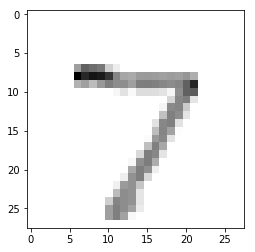

In [28]:
#Se pueden calcular predicciones utilizando el modelo
predictions = new_model.predict([x_test])
import numpy as np
#predictions es un ndarray de longitud igual a la cantidad de muestras de prueba.
#Cada uno de los elementos de predictions, representa la distribución de probabilidad de los 10 dígitos
#Esto es, cada uno de los elementos, a su vez tiene 10 elementos y representa cada uno de éstos la probabilidad de que 
#la muestra predecida sea determinado dígito.

2


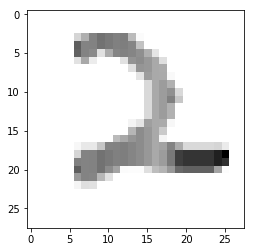

In [38]:
elem = 799
print(np.argmax(predictions[elem])) #prediciendo
plt.imshow(x_test[elem], cmap = plt.cm.binary)